Data found at following link: https://www.cdc.gov/mmwr/volumes/65/wr/mm6533a4.htm#T3_down

Import data from CDC, had to copy and paste into excel so there were some issues

Cleaned headers in Excel. Also removed "Regional", "Total", and redundant territory rows. US territories are included although they might skew the results. See below.

In [1]:
import pandas as pd

#CDC_Vaccine_Data=pd.read_csv('C:\\Users\\Monica\\Desktop\\Biomedical Informatics\\Stats and Probability\\BMI_6106\\final project raw vaccine data.csv', encoding= 'unicode_escape', header=None)
df = pd.read_csv('vax_data.csv')
df.head()

,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m
0,Connecticut,93.7 (±3.0),93.5 (±3.1),70.9 (±8.2),64.3 (±8.7),55.2 (±9.1),65.3 (±7.8)***,58.2 (±8.1)***,42.0 (±8.3)***
1,Maine,87.7 (±4.0),77.7 (±5.3),66.0 (±8.3),53.9 (±8.7),44.1 (±8.6),65.8 (±7.9)***,58.7 (±8.3)***,46.7 (±8.4)***
2,Massachusetts,91.2 (±4.1),89.5 (±4.4),73.5 (±8.6),63.0 (±9.5),52.8 (±9.7),63.0 (±8.8),50.9 (±9.1),35.2 (±8.5)
3,New Hampshire,92.4 (±3.9),87.7 (±4.4),74.2 (±8.8),59.7 (±10.0),51.4 (±10.0),69.8 (±7.9)***,55.1 (±9.0),47.1 (±9.1)***
4,Rhode Island,97.1 (±1.6)***,97.7 (±1.5),87.9 (±4.9)***,77.9 (±6.7),68.0 (±7.4)***,80.6 (±5.8)***,66.6 (±7.1),58.1 (±7.4)***


Clean up the data

In [2]:
import re
import numpy as np

# iterate through the columns
for col in df.columns[1:]:
    error = []
    values = []
    for v in df[col]:
        # Split using regex
        sp = re.split('\(|\)', str(v))
        if len(sp) < 2:
            # know where values are missing
            error.append(np.nan)
            values.append(np.nan)
        else:
            try:
                # make sure we have numbers and not strings
                values.append(float(sp[0]))
                error.append(float(sp[1][1:]))
            except ValueError:
                # hacky code to correct instances of '23. 4' for example
                values.append(float(sp[0].replace(' ', '')))
                error.append(float(sp[1][1:].replace(' ','')))
    # replace original column with cleaned, numerical column
    df[col] = values
    # now have a new column representing the 95% CI
    err_col = col + '_err'
    df[err_col] = error
df.head()

,HHS Region/State/Territory,gte1_Tdap_pct,gte1_MenACWY,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m,gte1_Tdap_pct_err,gte1_MenACWY_err,gte1_HPV_fem_err,gte2_HPV_fem_err,gte3_HPV_fem_err,gte1_HPV_m_err,gte2_HPV_m_err,gte3_HPV_m_err
0,Connecticut,93.7,93.5,70.9,64.3,55.2,65.3,58.2,42.0,3.0,3.1,8.2,8.7,9.1,7.8,8.1,8.3
1,Maine,87.7,77.7,66.0,53.9,44.1,65.8,58.7,46.7,4.0,5.3,8.3,8.7,8.6,7.9,8.3,8.4
2,Massachusetts,91.2,89.5,73.5,63.0,52.8,63.0,50.9,35.2,4.1,4.4,8.6,9.5,9.7,8.8,9.1,8.5
3,New Hampshire,92.4,87.7,74.2,59.7,51.4,69.8,55.1,47.1,3.9,4.4,8.8,10.0,10.0,7.9,9.0,9.1
4,Rhode Island,97.1,97.7,87.9,77.9,68.0,80.6,66.6,58.1,1.6,1.5,4.9,6.7,7.4,5.8,7.1,7.4


In [3]:
df.index = df.iloc[:,0]
# Standardize index names
df.index = [i.split('(')[0].strip()  for i in df.index]
# keep the columns we care about
hpv = df.iloc[:,3:9]
hpv.head()

,gte1_HPV_fem,gte2_HPV_fem,gte3_HPV_fem,gte1_HPV_m,gte2_HPV_m,gte3_HPV_m
Connecticut,70.9,64.3,55.2,65.3,58.2,42.0
Maine,66.0,53.9,44.1,65.8,58.7,46.7
Massachusetts,73.5,63.0,52.8,63.0,50.9,35.2
New Hampshire,74.2,59.7,51.4,69.8,55.1,47.1
Rhode Island,87.9,77.9,68.0,80.6,66.6,58.1


Let's look at differences between males and females

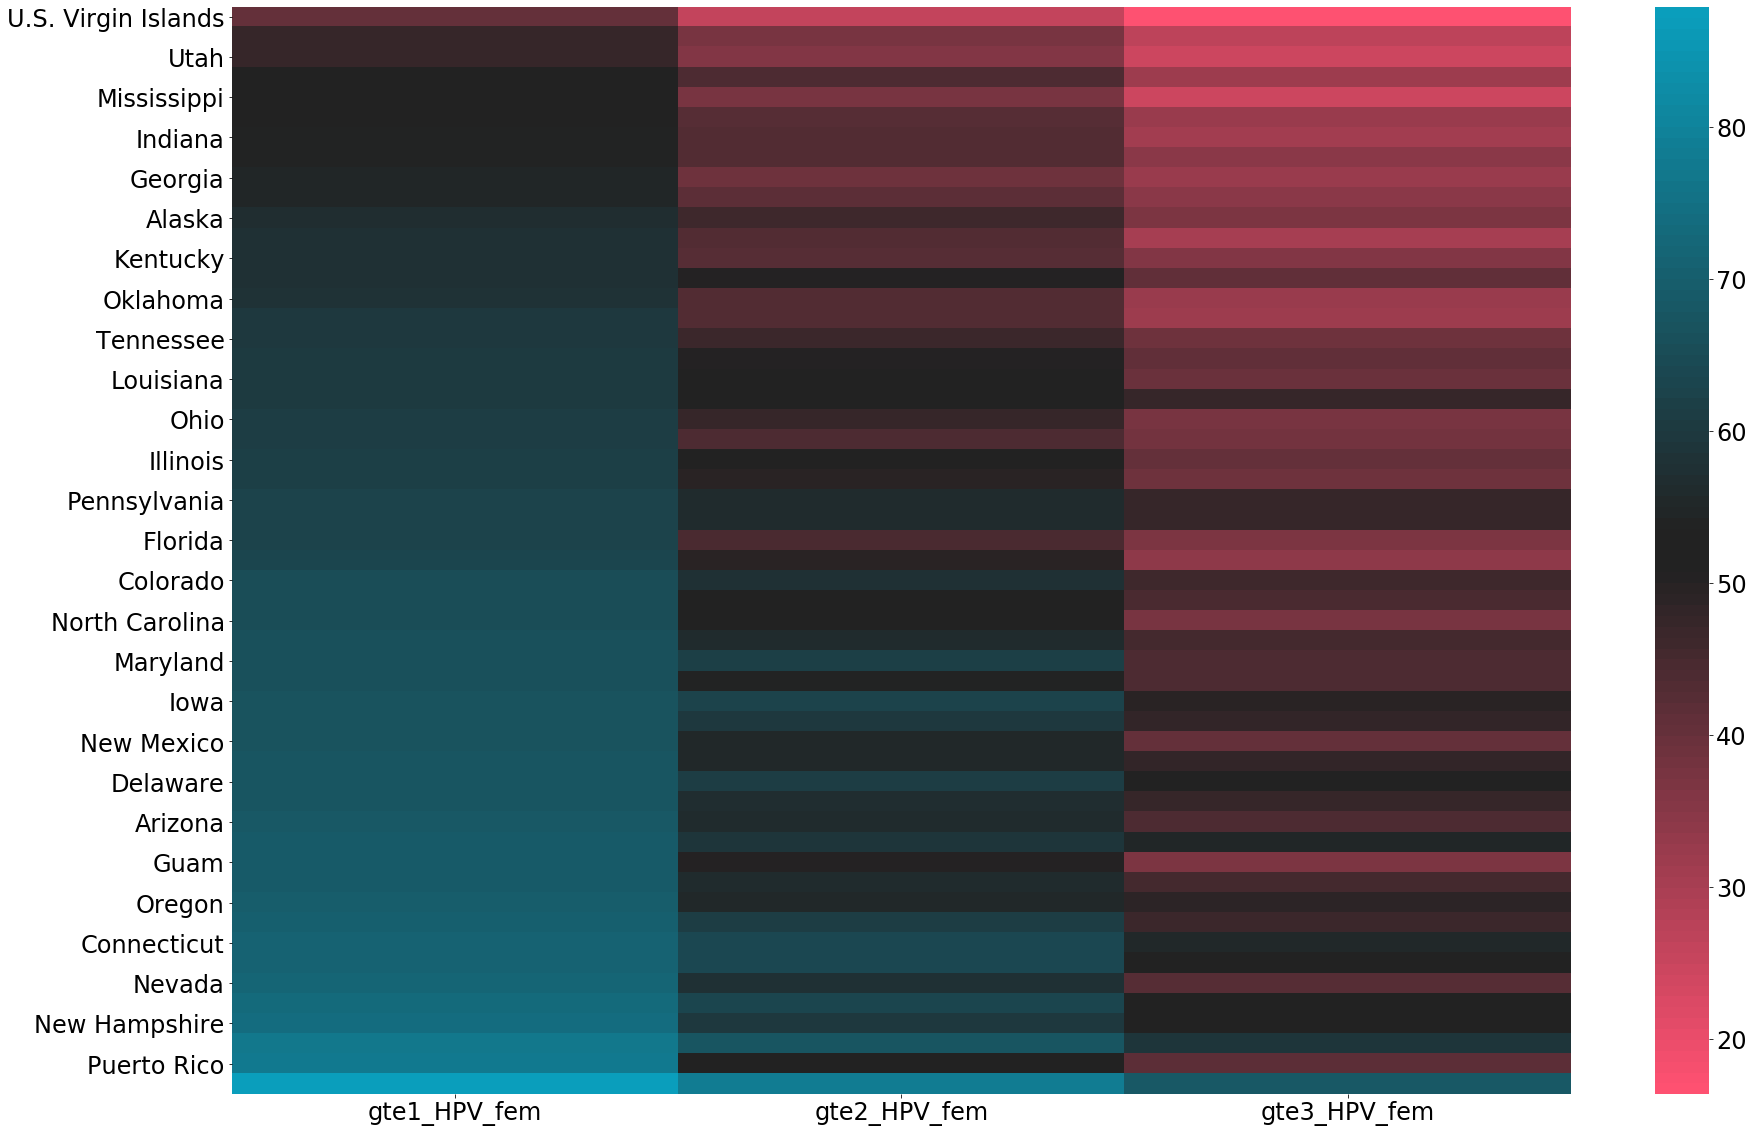

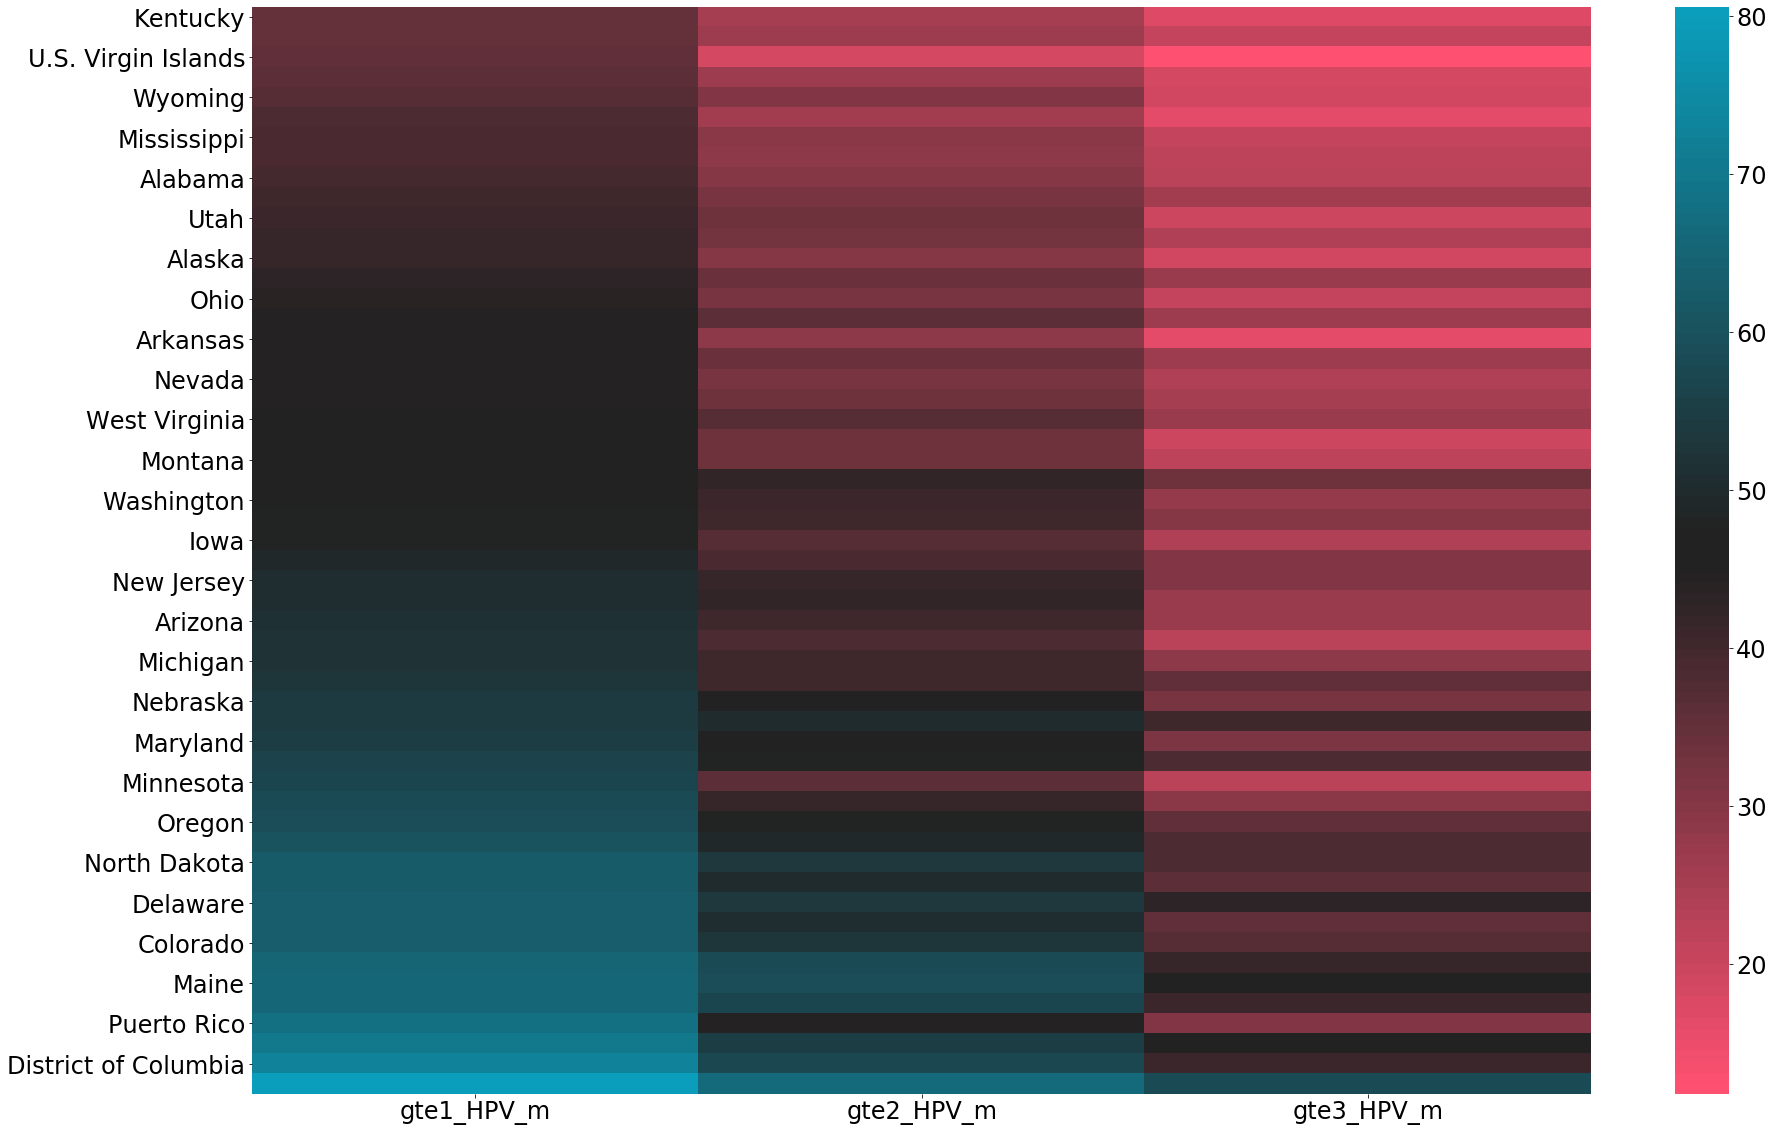

Text(0.5, 1.0, 'MannwhitneyuResult(statistic=1410.0, pvalue=0.38519615421170694)')

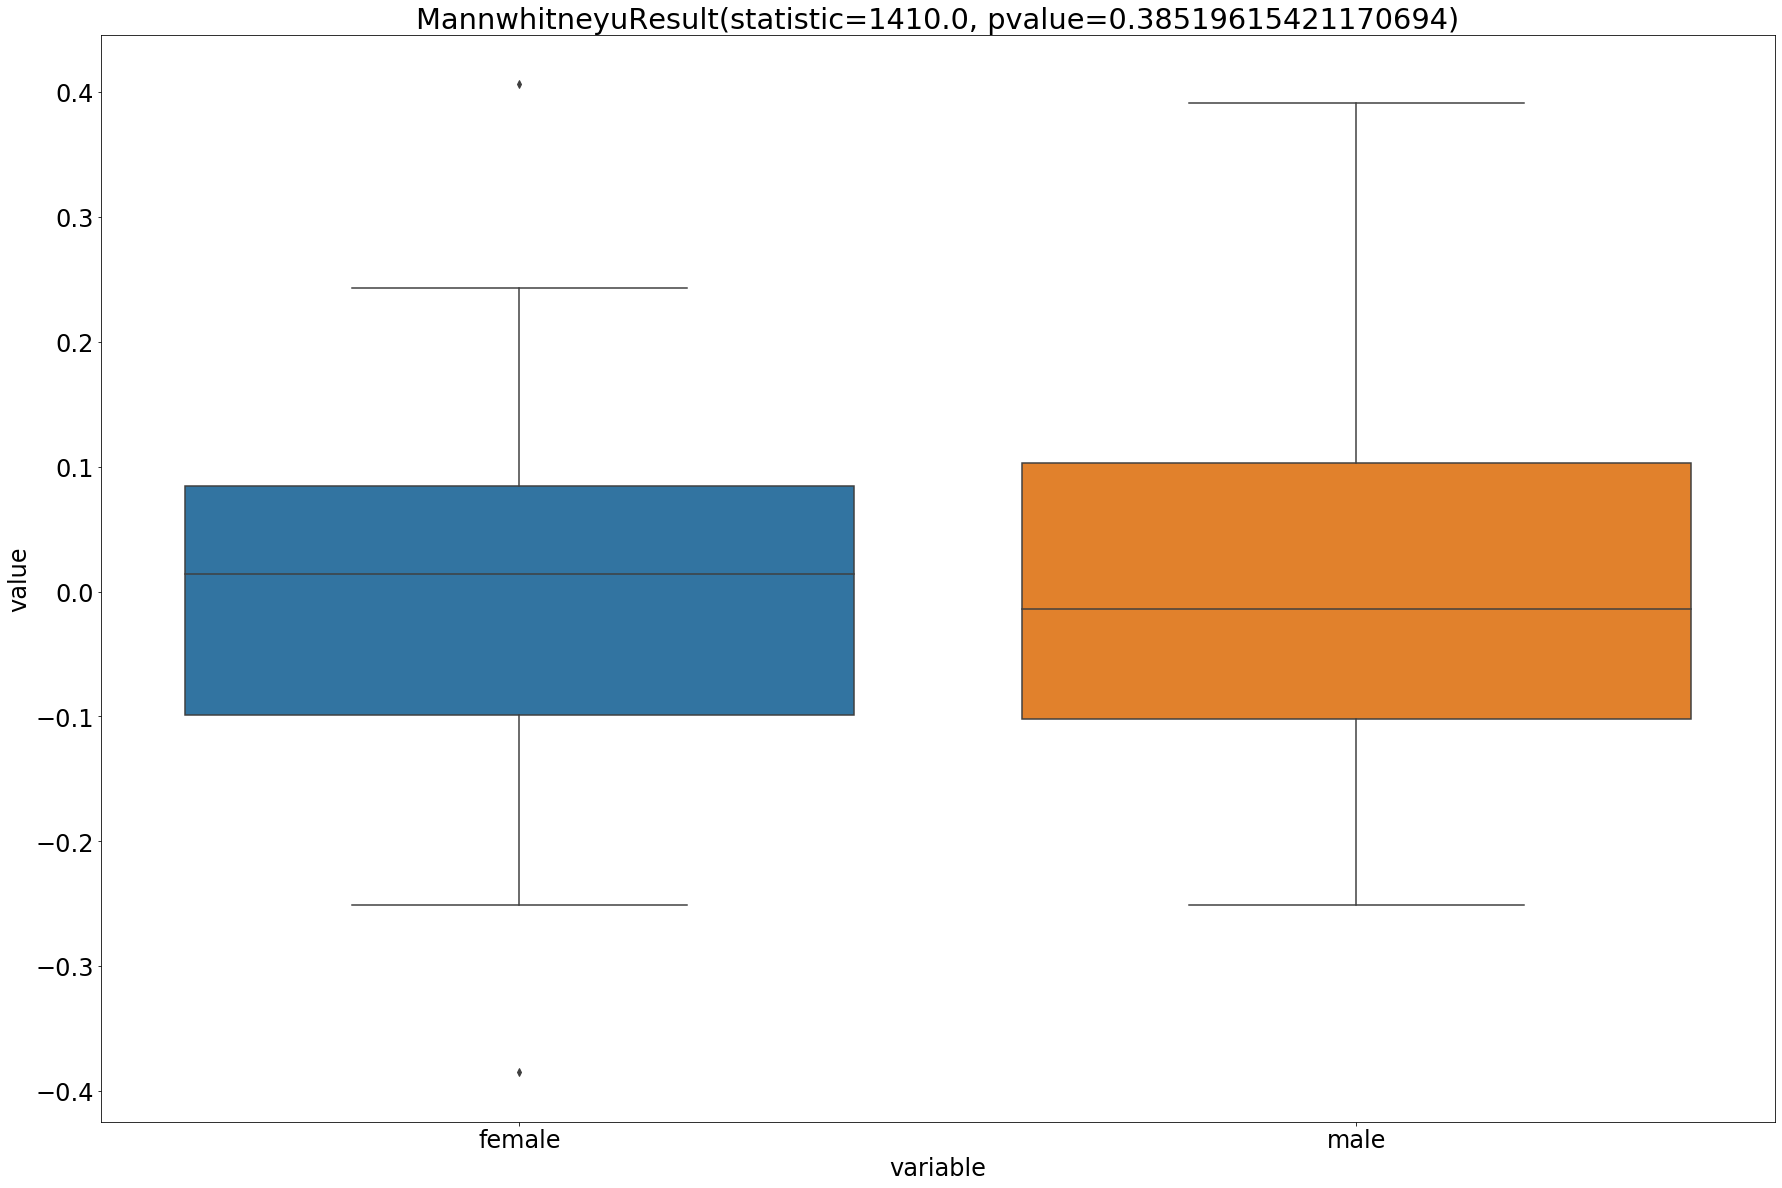

In [100]:
from scipy.stats import mannwhitneyu as mww

female = hpv.iloc[:,:3]
male = hpv.iloc[:,3:]
sv.plot_mat(female.sort_values(by=female.columns[0]))
sv.plot_mat(male.sort_values(by=male.columns[0]))

# Compare PC1 of both groups
fsvd = sv.pd_svd(female.sort_values(by=female.columns[0]))
msvd = sv.pd_svd(male.sort_values(by=male.columns[0]))
mfsvd = pd.DataFrame(index=fsvd[0].index).sort_index()
mfsvd['female'] = fsvd[0][fsvd[0].columns[0]]
mfsvd['male'] = msvd[0][msvd[0].columns[0]]

sns.boxplot(pd.melt(mfsvd).variable, pd.melt(mfsvd).value)
plt.title(str(mww(mfsvd.male, mfsvd.female)))
# sns.boxplot(fsvd[0].iloc[:,0])
# sns.boxplot(msvd[0].iloc[:0])

MWW p-value suggests there are no significant differences between male and female HPV vaccinations. Now we will restrict this to the first round of HPV vaccines

Text(0.5, 1.0, 'MannwhitneyuResult(statistic=556.5, pvalue=1.543692679981825e-08)')

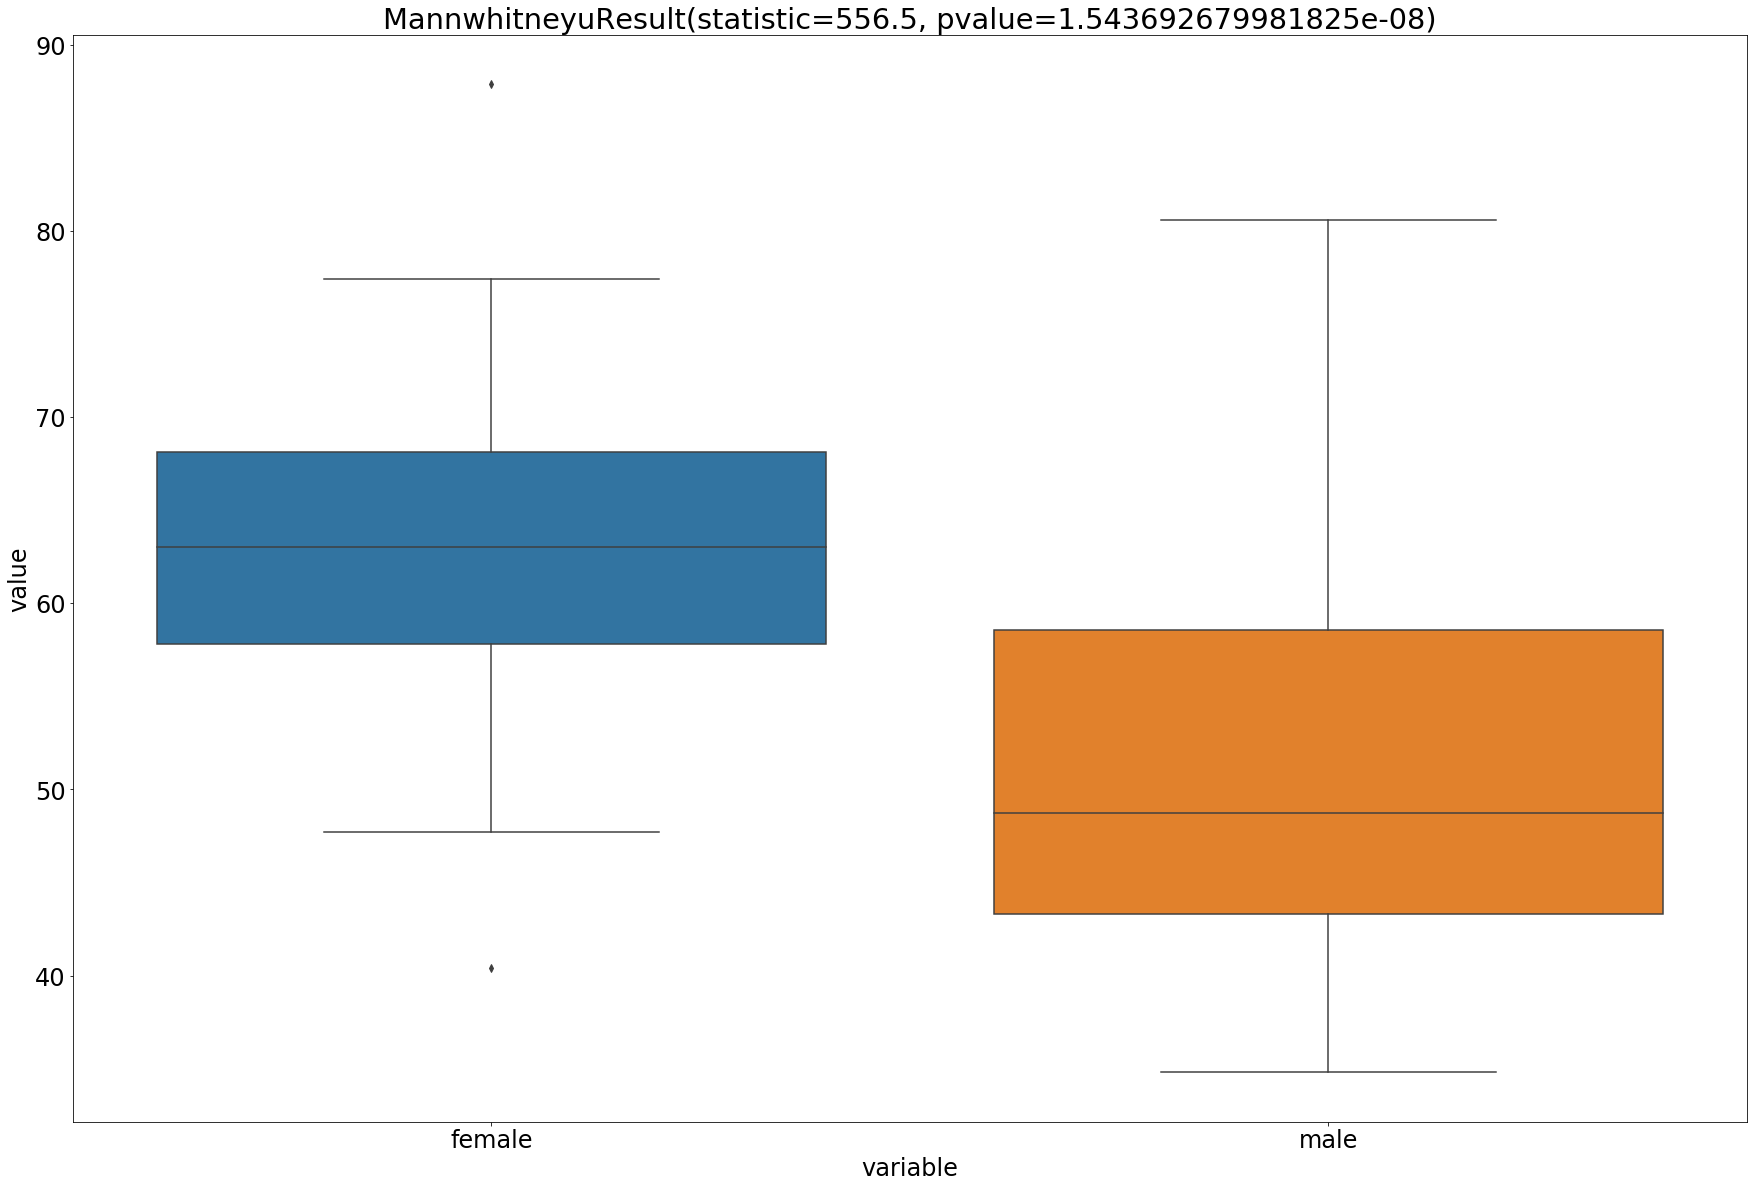

In [102]:
hpv1 = pd.DataFrame(index=female.index)
hpv1['female'] = female.iloc[:,0]
hpv1['male'] = male.iloc[:,0]
sns.boxplot(pd.melt(hpv1).variable, pd.melt(hpv1).value)
plt.title(str(mww(hpv1.male, hpv1.female)))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

gte2HPV_fem v.s. gte2HPV_m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.565e-07 U_stat=2.330e+03
gte1HPV_fem v.s. gte1HPV_m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.262e-08 U_stat=2.360e+03
gte3HPV_fem v.s. gte3HPV_m: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.372e-08 U_stat=2.412e+03


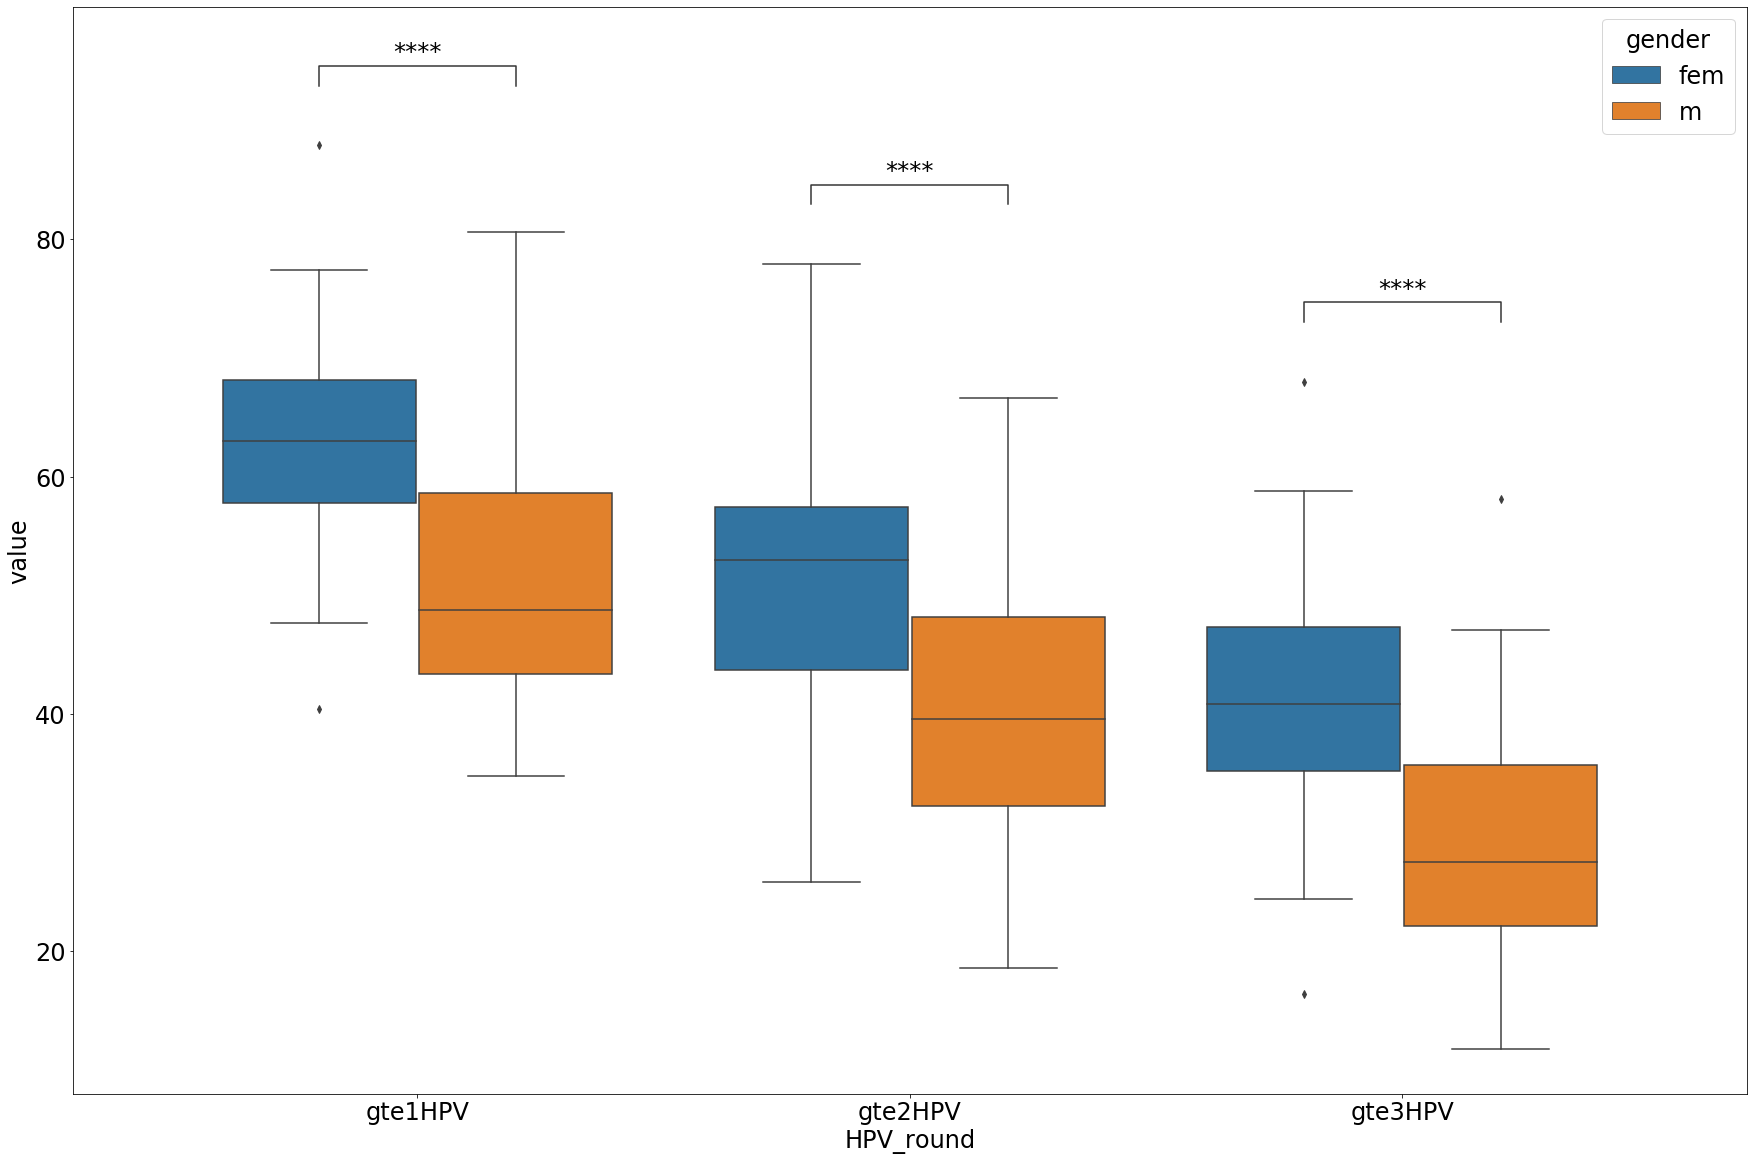

In [111]:
from statannot import add_stat_annotation

melt_hpv = pd.melt(hpv)
melt_hpv['gender'] = melt_hpv.variable.apply(lambda x: x.split('_')[-1])
melt_hpv['HPV_round'] = melt_hpv.variable.apply(lambda x: "".join(x.split('_')[:-1]))
order = list(set(melt_hpv.HPV_round))
boxpairs = [((order[0], 'fem'), (order[0], 'm')),
            ((order[1], 'fem'), (order[1], 'm')),
            ((order[2], 'fem'), (order[2], 'm'))]
ax = sns.boxplot(x="HPV_round", y="value", hue="gender", data=melt_hpv)
res = add_stat_annotation(ax, data=melt_hpv, x="HPV_round", y="value", hue="gender", 
                          box_pairs=boxpairs, test='Mann-Whitney', loc='inside')

Differences between men and women in each round turn out to all be statistically significant with Mann-Whitney-Wilcoxon p-values of all less than 2.57e-07.

### Further exploration with educational data

As preliminary exploration, I will plot a singular value decomposition to get a feel for the data

In [44]:
# Library for visualizing SVD
import svdawg as sv
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 30, 20
plt.rcParams['font.size'] = 10

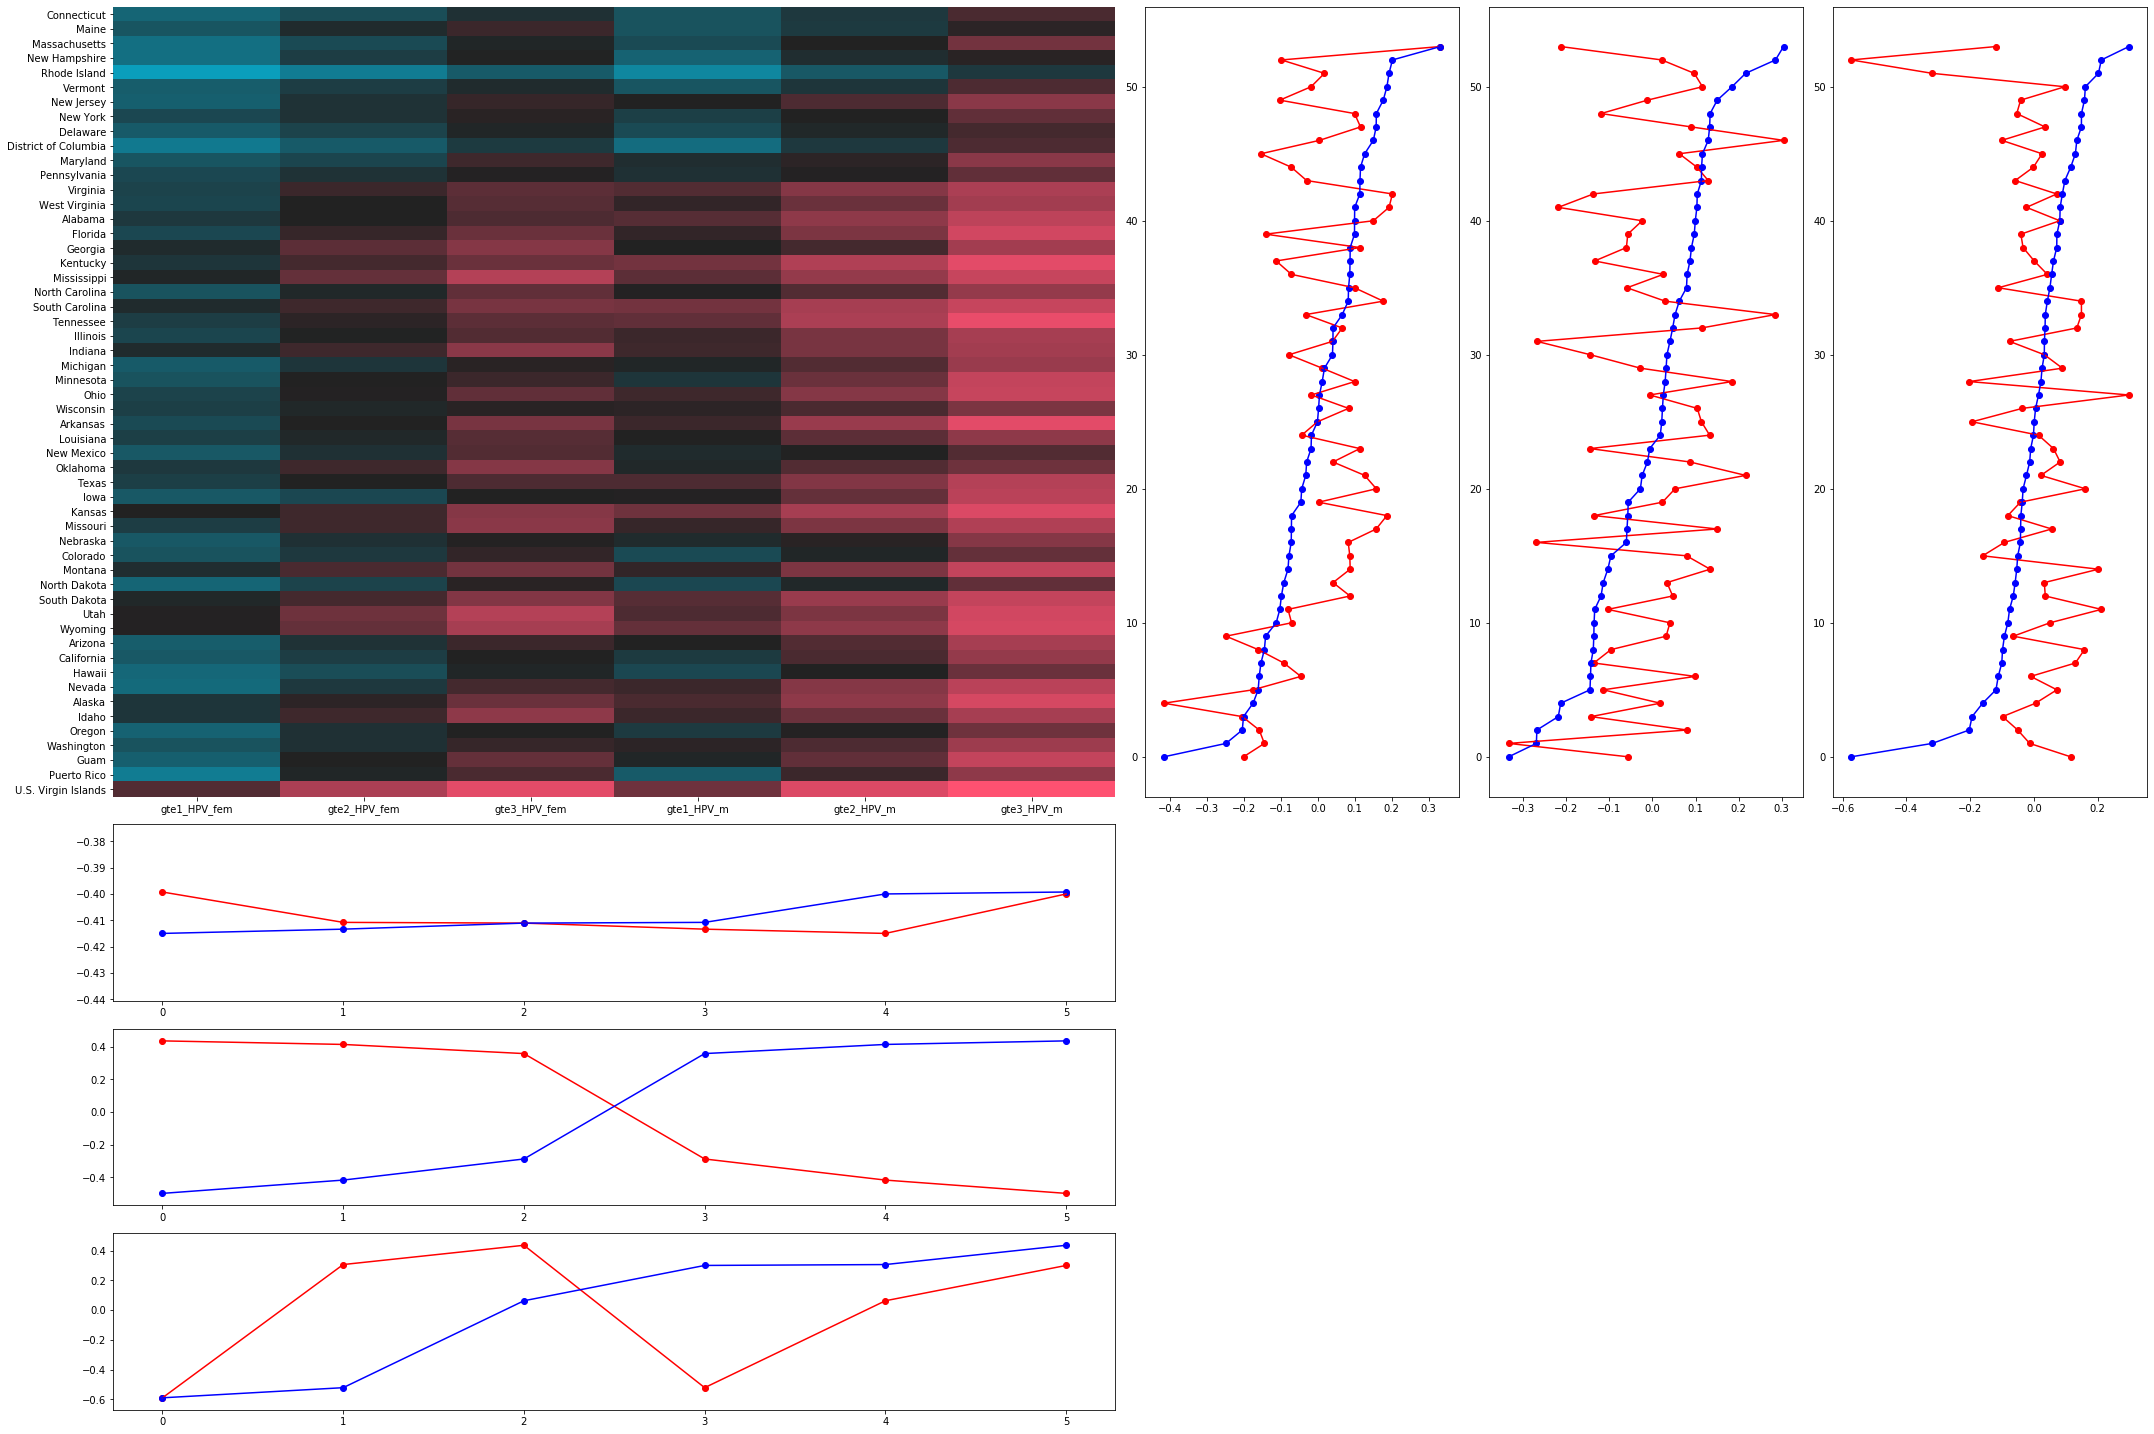

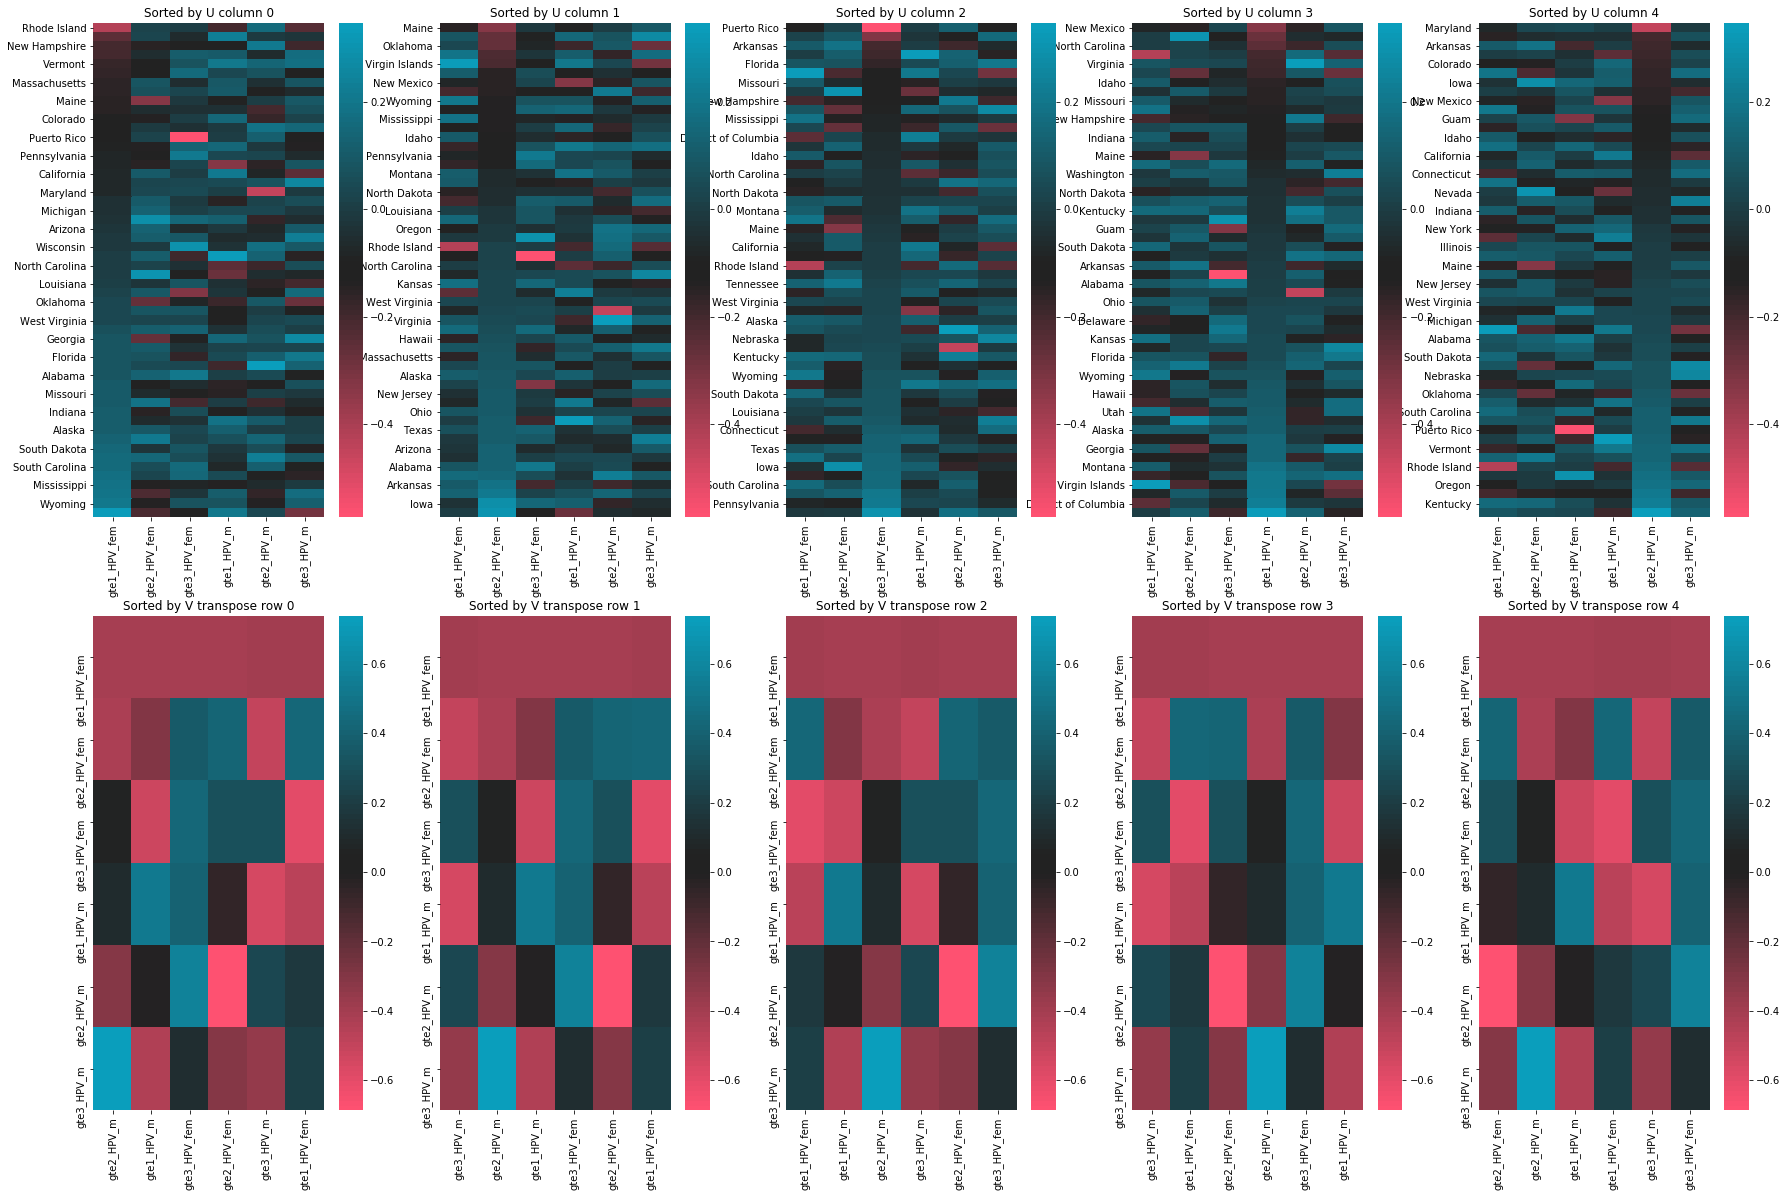

In [45]:
# Visualize SVD of vax data
svd = sv.pd_svd(hpv)
sv.svd_overview(hpv)
sv.plot_svs(svd)

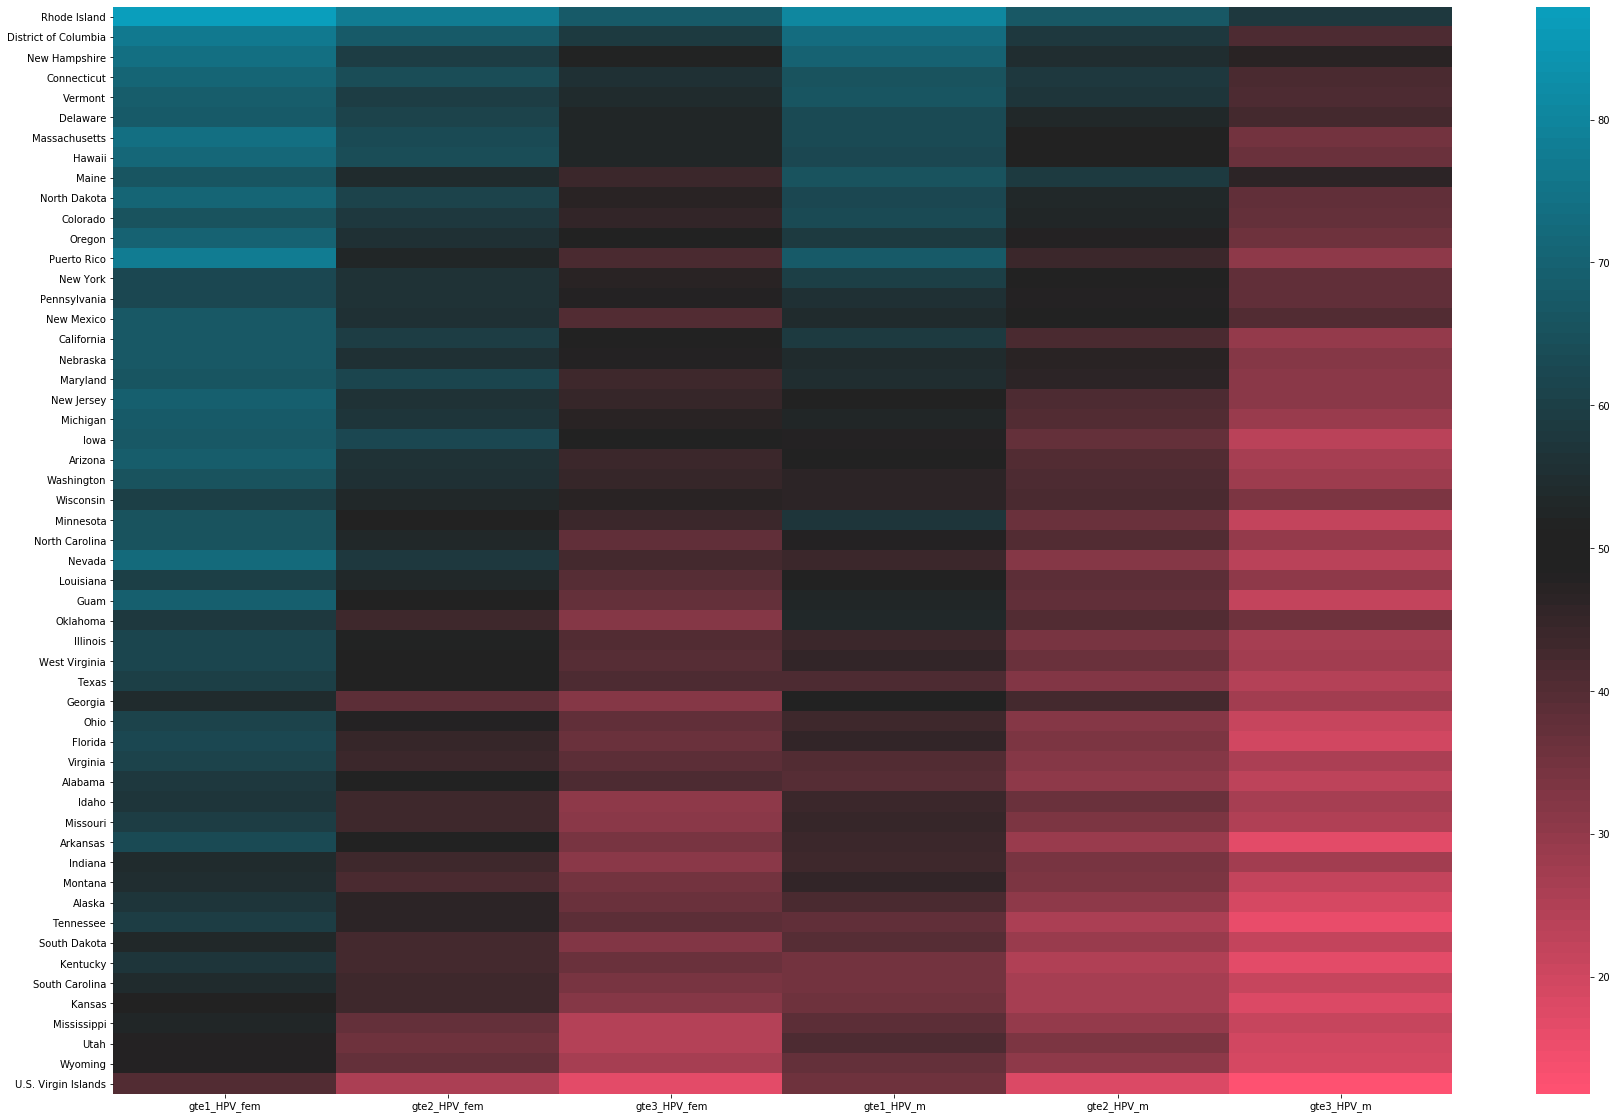

In [6]:
# Sort by top singular value in U
nidx = svd[0].sort_values(by=svd[0].columns[0]).index
sorthpv = hpv.loc[nidx,:]
sv.plot_mat((sorthpv))

From the above plot, we have clustered states with seemingly effective vaccination programs towards the top and less effective towards the bottom. 


We can also examine the scalar matrix of the SVD to see how important our singular values are

In [7]:
svd[1]

,0
0,16.746102
1,5.200311
2,2.979965
3,2.027025
4,1.502929
5,1.130061


From this, we see that most of the variance is indeed explained by the first singular value, so we will use that as a form of dimensionality reduction.

##### Examine relationship between HPV vaccinations and educational outcomes by state.

Download Excel from https://nces.ed.gov/programs/digest/d19/tables/dt19_203.40.asp?current=yes. This gives total enrollment information that can be used to normalize spending across states on a per pupil basis.

In [8]:
# Get total enrollment across states and territories after a little data cleaning
enrollment = pd.read_csv('enrollment.csv', header=None)
enrollment.head()

,0,1
0,Alabama .......................,742444
1,Alaska .........................,132872
2,Arizona ......................,1110851
3,Arkansas ........................,496085
4,California ......................,6304266


In [9]:
# standardize names
enrollment[0] = [i.strip().split('..')[0].strip() for i in enrollment[0]]
# encode as dictionary for quick access
e_dict = dict(zip(enrollment[0], enrollment[1]))

Now we can normalize educational spending on a per student basis. 

Let's look at total expenditures for public elementary and secondary education by state. Source: https://nces.ed.gov/programs/digest/d19/tables/dt19_236.30.asp?current=yes

In [10]:
expenditures = pd.read_csv('expenditures.csv', header=None, index_col=0)
expenditures.index = [i.strip().split('..')[0].strip() for i in expenditures.index]
expenditures.iloc[:,0] = [int(str(i).replace(',','')) for i in expenditures.iloc[:,0]]
expenditures['enrollment'] = [int(str(i).replace(',','')) for i in enrollment.iloc[:,1]]
expenditures['CostPerStudent'] = expenditures.iloc[:,0] / expenditures.iloc[:,1]
expenditures.columns = ['expenditures', 'enrollment', 'CostPerStudent']

In [11]:
expenditures.sort_values(by='CostPerStudent').head()

,expenditures,enrollment,CostPerStudent
Puerto Rico,2891749,346096,8.355338
Idaho,2560406,301186,8.501079
Utah,5813157,668274,8.698763
Oklahoma,6228822,695092,8.961148
Arizona,10530826,1110851,9.479963


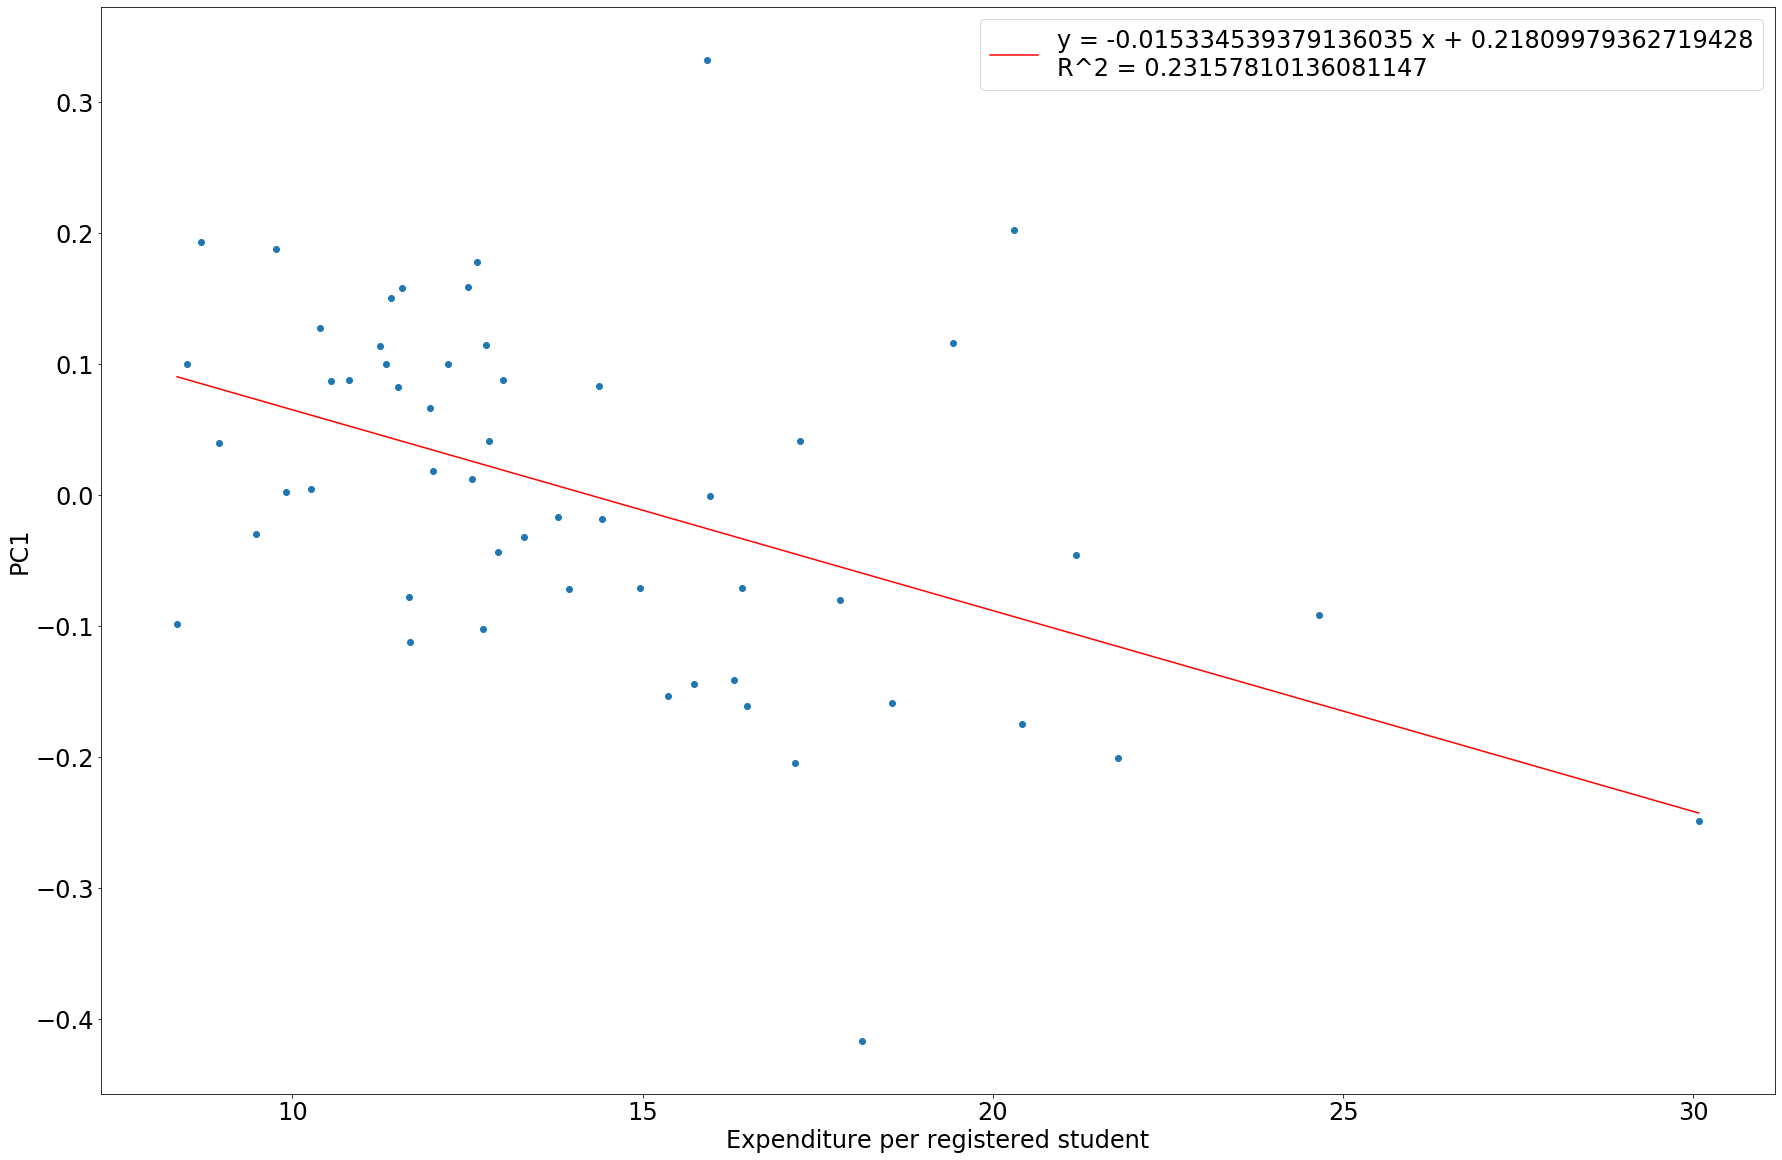

In [72]:
# using the first singular value
plt.rcParams['font.size'] = 24
fem_cps = svd[0]
hpvsv1 = fem_cps.iloc[:,0]
fem_cps.sort_index(inplace=True)
expenditures.sort_index(inplace=True)
fem_cps['CostPerStudent'] = expenditures.CostPerStudent
plt.scatter(fem_cps.CostPerStudent, fem_cps.gte1_HPV_fem)
plt.xlabel('Expenditure per registered student')
plt.ylabel('PC1')
plot_trendline(fem_cps.CostPerStudent, fem_cps.gte1_HPV_fem)

The plot above shows total education expenditures per registered student by state on the x-axis and their respective first principle components (PCs) on the y-axis. The PCs represent 

In [65]:
from statsmodels.formula.api import ols
import numpy as np

def plot_trendline(x, y, c='r'):
    data = {'x':x, 'y':y}
    model = ols("y ~ x", data=data)
    results = model.fit()
    m = results.params[1]
    b = results.params[0]
    xax = np.linspace(x.min(), x.max(), 100)
    yax = m * xax + b
    plt.plot(xax, yax,  c, label='y = {} x + {}\nR^2 = {}'.format(m, b, results.rsquared))
    plt.legend(fontsize=24)
    plt.show()

In [16]:
model = ols("gte1_HPV_fem ~ CostPerStudent", data=fem_cps)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gte1_HPV_fem   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     15.67
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           0.000230
Time:                        16:52:38   Log-Likelihood:                 38.192
No. Observations:                  54   AIC:                            -72.38
Df Residuals:                      52   BIC:                            -68.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2181      0.058      3.791      0.000       0.103       0.334
CostPerStudent    -0.0153      0.004     -3.959      0.000      -0.023      -0.008
==============================================================================
Omnibus:                        4.440   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.613
Skew:                           0.210   Prob(JB):                       0.0996
Kurtosis:                       4.369   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using sexual education data taken from https://www.guttmacher.org/state-policy/explore/sex-and-hiv-education

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                hpv_pc1   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     4.917
Date:                Thu, 26 Mar 2020   Prob (F-statistic):             0.0321
Time:                        17:23:42   Log-Likelihood:                 29.832
No. Observations:                  44   AIC:                            -55.66
Df Residuals:                      42   BIC:                            -52.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0222      0.025      0.884      0.382      -0.029       0.073
required      -0.0848      0.038     -2.217      0.032      -0.162      -0.008
==============================================================================
Omnibus:                        5.673   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.844
Skew:                          -0.805   Prob(JB):                       0.0887
Kurtosis:                       3.220   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

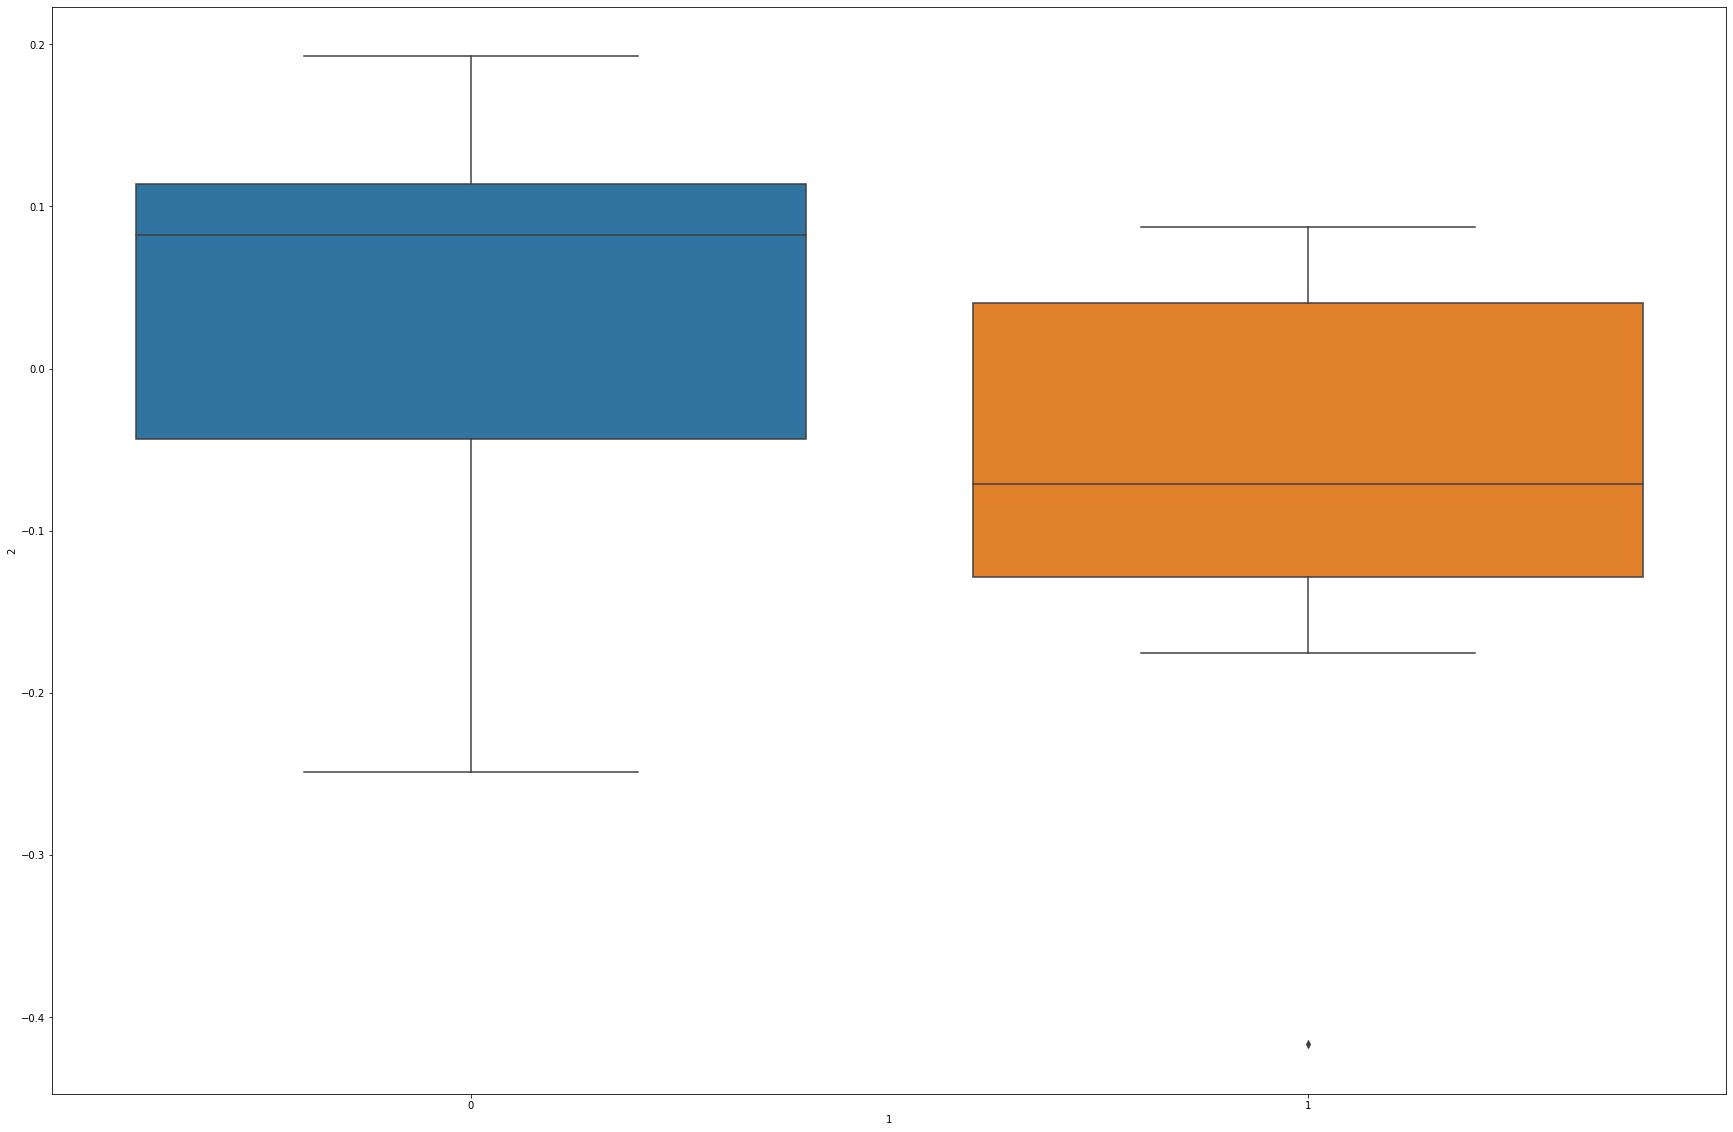

In [63]:
import seaborn as sns

cdm = pd.read_csv('condoms.csv', header=None, index_col=0)
cdm[2] = [hpvsv1[x] for x in cdm.index]
sns.boxplot(cdm[1], cdm[2])
cdm.columns = ['required', 'hpv_pc1']
cdm_model = ols('hpv_pc1 ~ required', data = cdm)
cdm_results = cdm_model.fit()
cdm_results.summary()

In [64]:
from scipy.stats import mannwhitneyu as mww

cdm_mww = mww(cdm[cdm.required == 1].hpv_pc1, cdm[cdm.required == 0].hpv_pc1)
cdm_mww

MannwhitneyuResult(statistic=142.0, pvalue=0.01219512071652702)

P-value from above suggests that including condoms in sex ed is correllated with higher HPV vaccination rates.

In [70]:
req = cdm[cdm.required == 1]
nreq = cdm[cdm.required == 0]
req

# plt.scatter(range(len(cdm[cdm.required == 1].hpv_pc1)), cdm[cdm.required == 1].hpv_pc1)
# plot_trendline(np.array(range(len(cdm[cdm.required == 1].hpv_pc1))), cdm[cdm.required == 1].hpv_pc1)

# plt.scatter(range(len(cdm[cdm.required == 0].hpv_pc1)), cdm[cdm.required == 0].hpv_pc1)
# plot_trendline(np.array(range(len(cdm[cdm.required == 0].hpv_pc1))), cdm[cdm.required == 0].hpv_pc1)

,required,hpv_pc1
0,,
Alabama,1,0.087635
California,1,-0.072051
Colorado,1,-0.112817
Delaware,1,-0.161605
Hawaii,1,-0.154093
Illinois,1,0.040934
Maine,1,-0.144808
Maryland,1,-0.071141
New Jersey,1,-0.045979


In [77]:
expenditures.head()

,expenditures,enrollment,CostPerStudent
Alabama,8030225,742444,10.815934
Alaska,2582582,132872,19.436616
Arizona,10530826,1110851,9.479963
Arkansas,5622673,496085,11.334092
California,87968218,6304266,13.953761


MannwhitneyuResult(statistic=189.0, pvalue=0.12770439022573526)

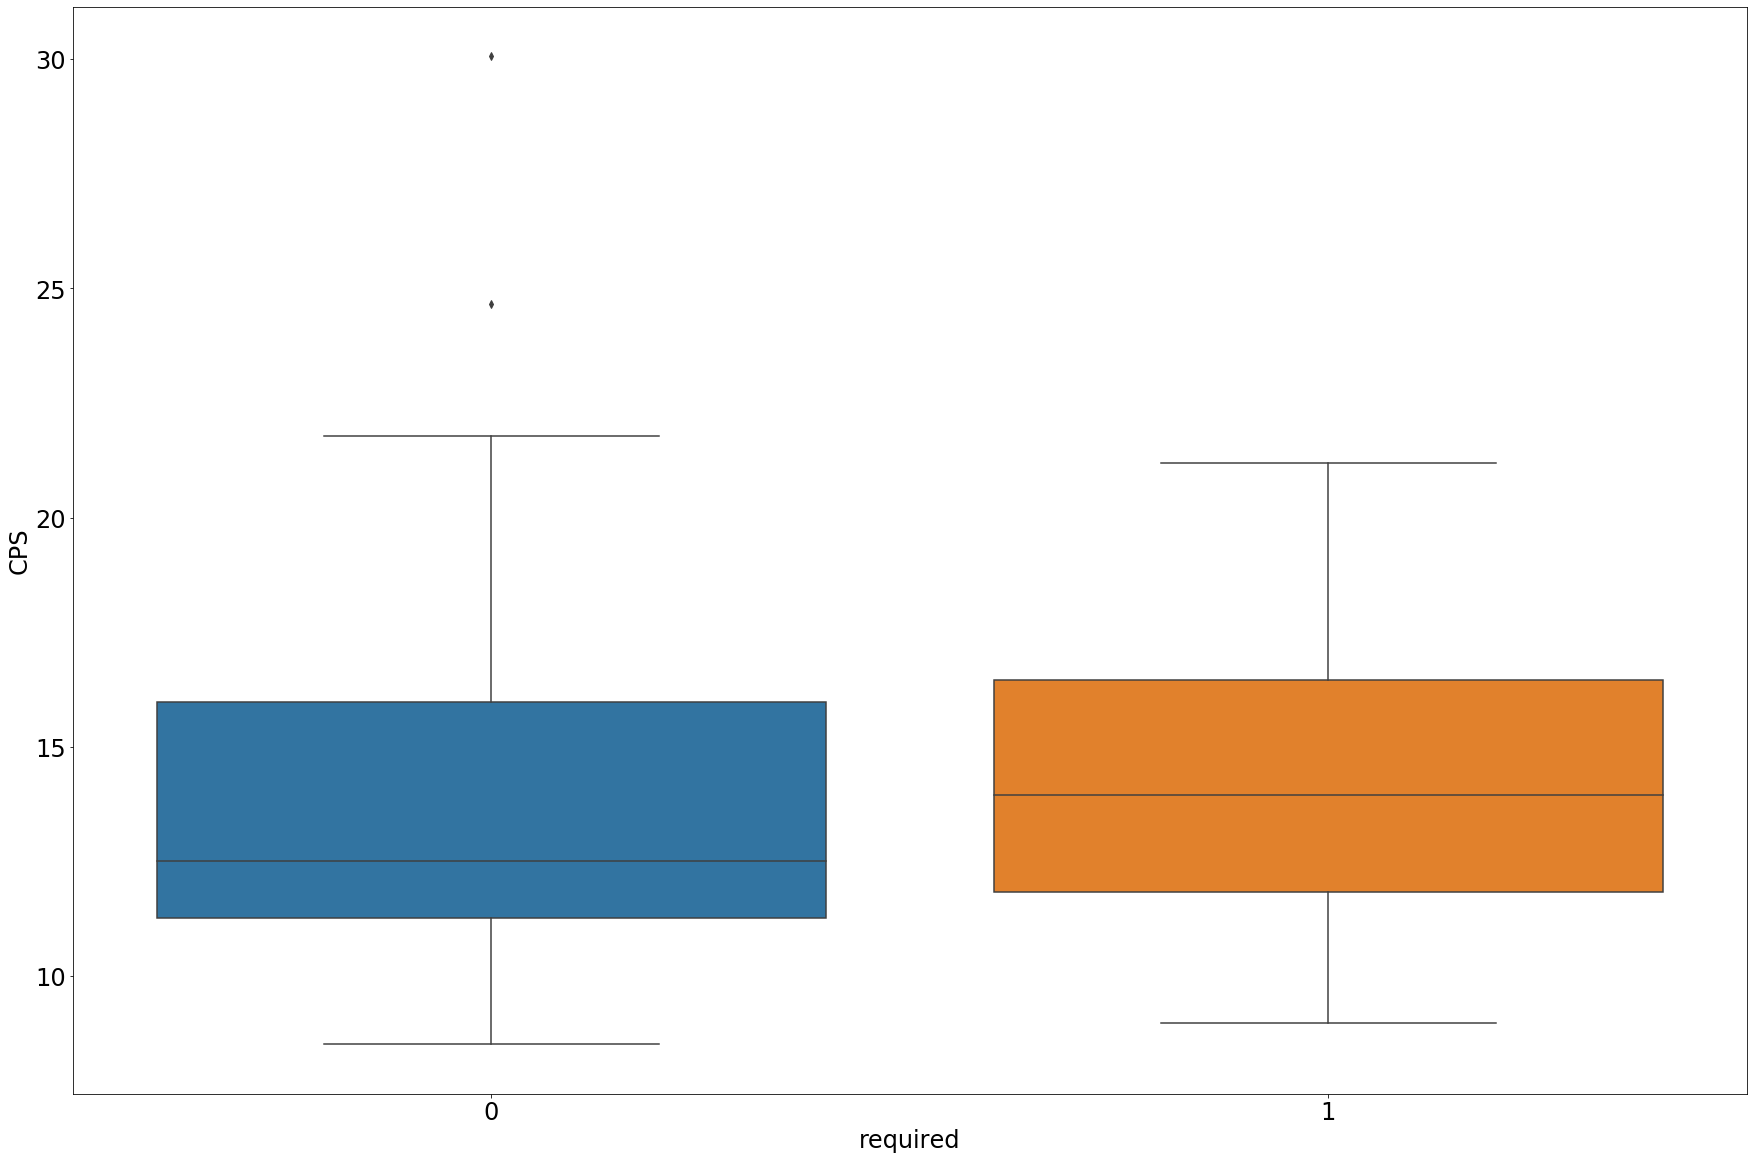

In [83]:
cdm['CPS'] = expenditures.CostPerStudent
sns.boxplot(cdm.required, cdm.CPS)
cdm_mww = mww(cdm[cdm.required == 1].CPS, cdm[cdm.required == 0].CPS)
cdm_mww